# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('C:\\Users\\Owner\\Desktop\\Python\\AdvPredModeling\\hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

C:\Users\Owner\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(263, 16)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

prepare MSE scoring variable, MLP's for diff hidden layer sizes and train/test data by scaling them

In [2]:
#first we scale our x variables
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
MLPA = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (2,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
MLPB = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (15,), solver ='sgd', learning_rate = 'constant', random_state = 42, batch_size = 40, 
                  learning_rate_init = 0.001)
mse = make_scorer(mean_squared_error)

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

# 1

In [6]:
#A
score = cross_val_score(MLPA, X_train, y_train, cv = 5, scoring = mse)
print 'rmse A:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE A:", M/5

#B
score = cross_val_score(MLPB, X_train, y_train, cv = 5, scoring = mse)
print 'rmse B:', np.sqrt(score)
M = sum(np.sqrt(score))
print "AVG RMSE B:", M/5

rmse A: [ 307.50792543  546.87974159  439.93924147  420.0741545   334.53974802]
AVG RMSE A: 409.788162201
rmse B: [ 286.84504868  416.45656003  312.06216944  299.24343233  239.73039363]
AVG RMSE B: 310.867520821


We see that the model with the higher hidden layer size has the MSE decrease which makes sense itnuitively as more complex models generally decrease MSE but can start to overfit at some point

# 2

we see that for both models the RMSE goes down when the the hidden layer sizes increase, meaning that model B is better and of course the RMSE increases when going from the training to the test data.
However, the avg RMSE from part 1 and model B was lower than the RMSE for any of the models trained on the entire dataset

In [8]:
#getting training RMSe
trainmodelA = MLPA.fit(X_train, y_train)
trainmodelB = MLPB.fit(X_train, y_train)
pred_Ya = trainmodelA.predict(X_train)
pred_Yb = trainmodelB.predict(X_train)
scoreA = mean_squared_error(y_train, pred_Ya)
scoreB = mean_squared_error(y_train, pred_Yb)
print 'RMSE on training data for part A:', np.sqrt(scoreA)
print 'RMSE on training data for part B:', np.sqrt(scoreB)

#getting testing RMSE
testmodelA = MLPA.fit(X_train, y_train)
testmodelB = MLPB.fit(X_train, y_train)
pred_Ya = trainmodelA.predict(X_test)
pred_Yb = trainmodelB.predict(X_test)
scoreA = mean_squared_error(y_test, pred_Ya)
scoreB = mean_squared_error(y_test, pred_Yb)
print 'RMSE on test data for part A:', np.sqrt(scoreA)
print 'RMSE on test data for part B:', np.sqrt(scoreB)

 RMSE on training data for part A: 364.368091219
RMSE on training data for part B: 300.095370331
RMSE on test data for part A: 486.722986238
RMSE on test data for part B: 412.637972754


# 3

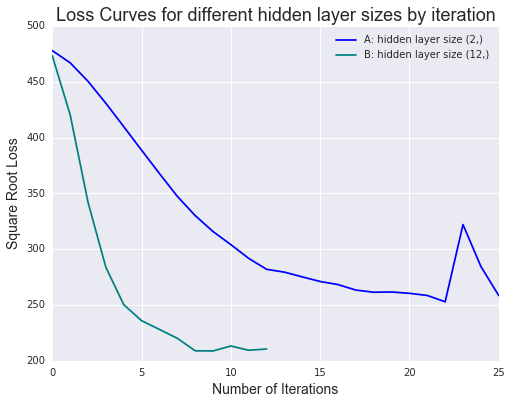

In [70]:
import seaborn

Acurve = np.sqrt(testmodelA.loss_curve_)
Bcurve = np.sqrt(testmodelB.loss_curve_)

plt.figure(figsize=(8,6))

plt.plot(Acurve, color='blue', label = 'A: hidden layer size (2,)')
plt.plot(Bcurve, color='teal', label = 'B: hidden layer size (12,)')
plt.ylabel('Square Root Loss', fontsize = 14)
plt.xlabel('Number of Iterations', fontsize = 14)
plt.title('Loss Curves for different hidden layer sizes by iteration', fontsize = 18)
plt.legend(loc='upper right')
plt.show()

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

# Data Prep

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('C:\\Users\\Owner\\Desktop\\Python\\Datasets\\Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])
newdata = pd.get_dummies(data)
df = res.drop('Direction_Down', 1)
train = df.ix[199:1199]
test = df.ix[1200:]
train_X = train[[0,1,2,3,4]] 
train_X = train_X.values
train_y = train[[5]]
train_y = train_y.values
test_X = test[[0,1,2,3,4]]
test_X = test_X.values
test_y = test[[5]]
test_y = test_y.values
NB = GaussianNB()
LD = LDA(solver='lsqr',shrinkage = 'auto')
QD = QDA()
Roc = roc_curve
Roc_score = roc_auc_score

Here we created a function to return the extracted probabilites for each type of model

In [327]:
def BayesianClassifier(modeltype, train_X, train_y, test_X):
    
    '''takes bayesian models of Linear/Quadratic Discriminant Analysis, Gaussian Naiive Bayes
    and return an array of predicted probabilities as an array
    
        Note: data must be in an array   '''
    
    fitted_model = modeltype.fit(train_X, train_y)
    predicted_y = modeltype.predict(test_X)
    predicted_probabilities = modeltype.predict_proba(test_X)
    return predicted_probabilities

In [ ]:
predictedprobsQD = BayesianClassifier(QD, train_X, train_y, test_X)
predictedprobsNB = BayesianClassifier(NB, train_X, train_y, test_X)
predictedprobsLD = BayesianClassifier(LD, train_X, train_y, test_X)

define function to return Roc parameters and AUC score

In [300]:
def RocCurve(predprobs, actual_y):
    '''predicted probabilities should be in form of an array
    
    function returns the fpr, tpr, threshold and the AUC of the ROC Curve as the score1'''
    
    pos_probs = []
    for i in predprobs:
        pos_probs.append(i[1])
    fpr, tpr, threshold = roc_curve(actual_y, pos_probs)
    score = roc_auc_score(actual_y, pos_probs, average = 'weighted')
    return fpr, tpr, threshold, score

Call function to get returned values as useable values for graphing

In [301]:
QDfpr = RocCurve(predictedprobsQD, test_y)[0]
QDtpr = RocCurve(predictedprobsQD, test_y)[1]
QDthresh = RocCurve(predictedprobsQD, test_y)[2]
QDAUCscore = RocCurve(predictedprobsQD, test_y)[3]
NBfpr = RocCurve(predictedprobsNB, test_y)[0]
NBtpr = RocCurve(predictedprobsNB, test_y)[1]
NBthresh = RocCurve(predictedprobsNB, test_y)[2]
NBAUCscore = RocCurve(predictedprobsNB, test_y)[3]
LDfpr = RocCurve(predictedprobsLD, test_y)[0]
LDtpr = RocCurve(predictedprobsLD, test_y)[1]
LDthresh = RocCurve(predictedprobsLD, test_y)[2]
LDAUCscore = RocCurve(predictedprobsLD, test_y)[3]

Now simply graph the different classifiers

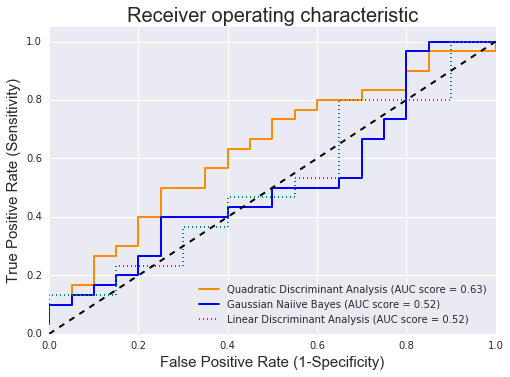

In [322]:
plt.figure()
lw = 2
plt.plot(QDfpr, QDtpr, color='darkorange',
         lw=lw, label='Quadratic Discriminant Analysis (AUC score = %0.2f)' % QDAUCscore)
plt.plot(NBfpr, NBtpr, color='blue',
         lw=lw, label='Gaussian Naiive Bayes (AUC score = %0.2f)' % NBAUCscore)
plt.plot(LDfpr, LDtpr, color='teal',
         lw=lw, linestyle = ':', label='Linear Discriminant Analysis (AUC score = %0.2f)' % LDAUCscore)

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

We see that Quadratic Discriminant Analysis model did the best with the highest AUC score and you see visually that the curve is the closest to the upper left corner. That corner is ideal because there you have the highest sensitivity (correct predictions) and the least false predictions (1-Specificity) or the false positive rate

NB and LDA only did marginally better than 0.5 which is not good, as this indicates you could do almost as well by random chance of flipping a coin and guessing

## part 6
### now we'll run the same things as before, except now we use only 100 training data points rather than 1000

In [330]:
newtrain = train.ix[1099:]
train_X100 = newtrain[[0,1,2,3,4]] 
train_X100 = train_X100.values
train_y100 = newtrain[[5]]
train_y100 = train_y100.values

In [332]:
predictedprobsQD = BayesianClassifier(QD, train_X100, train_y100, test_X)
predictedprobsNB = BayesianClassifier(NB, train_X100, train_y100, test_X)
predictedprobsLD = BayesianClassifier(LD, train_X100, train_y100, test_X)

QDfpr = RocCurve(predictedprobsQD, test_y)[0]
QDtpr = RocCurve(predictedprobsQD, test_y)[1]
QDthresh = RocCurve(predictedprobsQD, test_y)[2]
QDAUCscore = RocCurve(predictedprobsQD, test_y)[3]
NBfpr = RocCurve(predictedprobsNB, test_y)[0]
NBtpr = RocCurve(predictedprobsNB, test_y)[1]
NBthresh = RocCurve(predictedprobsNB, test_y)[2]
NBAUCscore = RocCurve(predictedprobsNB, test_y)[3]
LDfpr = RocCurve(predictedprobsLD, test_y)[0]
LDtpr = RocCurve(predictedprobsLD, test_y)[1]
LDthresh = RocCurve(predictedprobsLD, test_y)[2]
LDAUCscore = RocCurve(predictedprobsLD, test_y)[3]

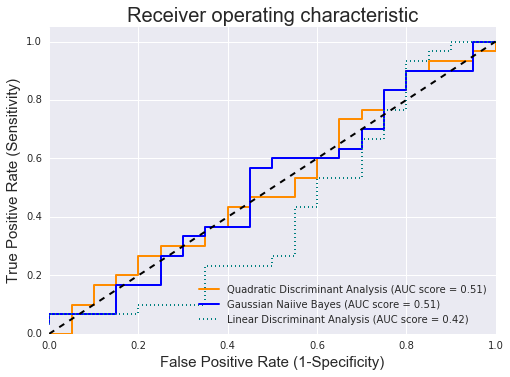

In [333]:
plt.figure()
lw = 2
plt.plot(QDfpr, QDtpr, color='darkorange',
         lw=lw, label='Quadratic Discriminant Analysis (AUC score = %0.2f)' % QDAUCscore)
plt.plot(NBfpr, NBtpr, color='blue',
         lw=lw, label='Gaussian Naiive Bayes (AUC score = %0.2f)' % NBAUCscore)
plt.plot(LDfpr, LDtpr, color='teal',
         lw=lw, linestyle = ':', label='Linear Discriminant Analysis (AUC score = %0.2f)' % LDAUCscore)

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

We see that when we only have the last 100 data points none of our models do better than random chance (.5), and LDA even did worse at .42 than just not having a model at all

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [3]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,8,307,130,3504,12.0,70,1
1,15,8,350,165,3693,11.5,70,1
2,18,8,318,150,3436,11.0,70,1
3,16,8,304,150,3433,12.0,70,1
4,17,8,302,140,3449,10.5,70,1


# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn
import matplotlib as plt
from sklearn.preprocessing import StandardScaler

%pylab inline
df = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\Datasets\\AmesHousingtrain.csv")
kaggletestypred = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\Datasets\\AmesHousingtest.csv")

print df.shape
print kaggletestypred.shape
print df.head()
print kaggletestypred.head()

Populating the interactive namespace from numpy and matplotlib
(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN  

`%matplotlib` prevents importing * from pylab and numpy


# 1 Preprocessing

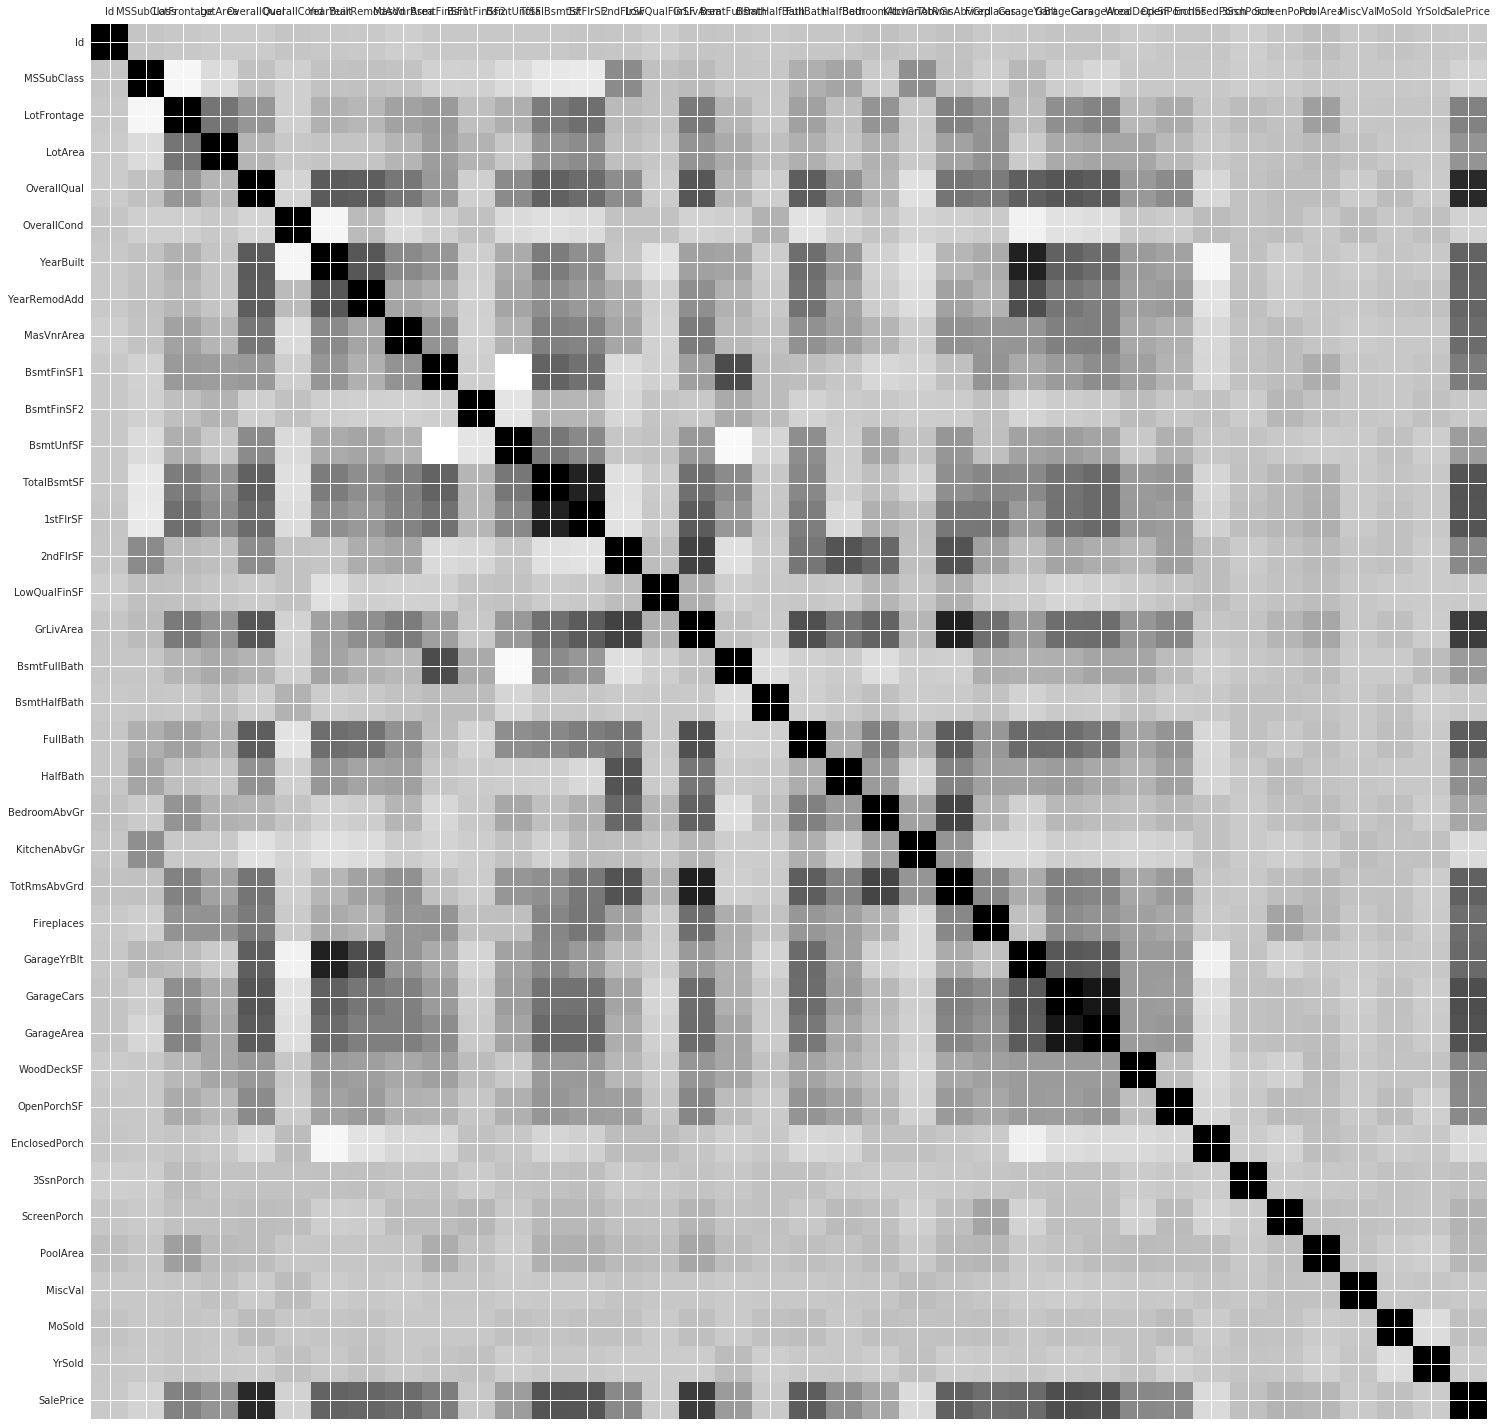

In [65]:
#try to see how variables are correlated but its hard to tell since we have so many features
def plot_corr(df,size = 25):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(df)

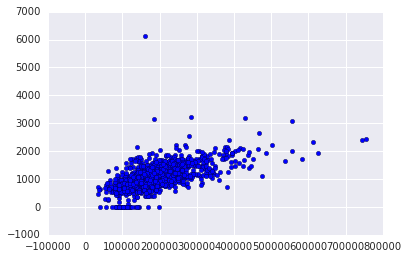

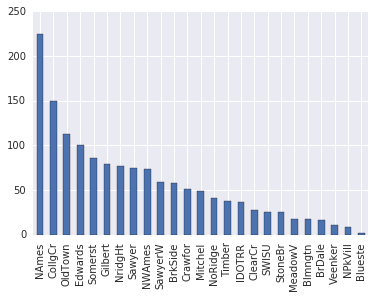

In [75]:
#to replicate the prof's benchmark we first just ran a regression with total sq ft and neighborhod in a regression
#variables = SalesPrice = TotalBsmtSF + Neighborhood
#before this though let's look at the scatterplots of these variables

#as Square footage gets larger, so does price --> positive correlation
SFPrice = plt.scatter(df['SalePrice'], df['TotalBsmtSF'])
show(SFPrice)

df['Neighborhood'].value_counts().plot(kind='bar')


In [92]:
dfnew = df[['SalePrice'] + ['TotalBsmtSF'] + ['Neighborhood']]
dfnew[:5]

,SalePrice,TotalBsmtSF,Neighborhood
0,208500,856,CollgCr
1,181500,1262,Veenker
2,223500,920,CollgCr
3,140000,756,Crawfor
4,250000,1145,NoRidge


In [91]:
#now that we know a little about our data let's finally run a MLR of these variables and see the results we get
#Split data into training & test Sets
import numpy as np
import pandas as pd

train, test = train_test_split(dfnew, test_size = 0.33)
print train['SalePrice']
#scaler = StandardScaler()
#X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

#######Fit MLR model on training data###############
#Step 1: setup design matrices
y, X = dmatrices('SalePrice ~ TotalBsmtSF + Neighborhood', data=train, return_type='dataframe')
#Step 2: Fit regression model
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

##first Let's find the in-sample MSE and then we'll find the out of sample MSE and RMSE
ypred = results.predict(X)
MSE_insample = mean_squared_error(y, ypred)
RMSE_insample = sqrt (MSE_insample)
print 'Coefficients:'
print results.params
print "The MSE on the training data is:", MSE_insample
print "the RMSE on the training data is:", RMSE_insample
#Out of Sample Prediction
y, X = dmatrices('SalePrice ~ TotalBsmtSF + Neighborhood', data=X_test, return_type='dataframe')
ypred = results.predict(X)
MSE_OOS = mean_squared_error(y, ypred)
RMSE = sqrt(MSE_OOS)
print "The MSE on the test data is:", MSE_OOS
print "The MSE goes up by", MSE_OOS - MSE_insample, "when you go from train to test data"
print "The RMSE is:", RMSE

475     132500
1010    135000
753     275500
162     220000
1185    104900
1059    220000
1277    197900
1197    144000
1097    170000
120     180000
1362    104900
323     126175
342      87500
916      35311
966     160000
591     451950
499     120000
685     207500
1000     82000
1034    119750
874      66500
867     129000
209     145000
879     136500
1064    154000
723     135000
826     109500
863     132500
1352    134900
597     194201
         ...  
974     167500
259      97000
996     136500
347     157500
349     437154
158     254900
781     175900
452     204000
809     106000
500     113000
469     187000
22      230000
370     172400
724     320000
1148    116900
761     100000
1379    167500
1140    139000
408     280000
1032    310000
601     141000
1015    227000
152     190000
1358    177500
387     125000
548     125000
1407    112000
552     255500
251     235000
104     169500
Name: SalePrice, dtype: int64


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [68]:
print train.head()
print test.head()

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
510    511          20       RL         75.0    14559   Pave   NaN      Reg   
944    945          20       RL          NaN    14375   Pave   NaN      IR1   
1075  1076          70       RL         75.0    13125   Pave   NaN      Reg   
111    112          80       RL          NaN     7750   Pave   NaN      IR1   
748    749          20       RL         59.0    10593   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
510          Lvl    AllPub    ...            0    NaN   NaN        Shed   
944          Lvl    NoSeWa    ...            0    NaN   NaN         NaN   
1075         Lvl    AllPub    ...            0    NaN   NaN         NaN   
111          Lvl    AllPub    ...            0    NaN   NaN         NaN   
748          Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
510     2